# Help and Documentation in IPython
## Introduction

$$(x+y)(x-y)=x^2-y^2$$

If you read no other section in this chapter, read this one: I find the tools discussed here to be the most transformative contributions of IPython to my daily workflow.

When a technologically-minded person is asked to help a friend, family member, or colleague with a computer problem, most of the time it's less a matter of knowing the answer as much as knowing how to quickly find an unknown answer.
In data science it's the same: searchable web resources such as online documentation, mailing-list threads, and StackOverflow answers contain a wealth of information, even (especially?) if it is a topic you've found yourself searching before.
Being an effective practitioner of data science is less about memorizing the tool or command you should use for every possible situation, and more about learning to effectively find the information you don't know, whether through a web search engine or another means.

One of the most useful functions of IPython/Jupyter is to shorten the gap between the user and the type of documentation and search that will help them do their work effectively.
While web searches still play a role in answering complicated questions, an amazing amount of information can be found through IPython alone.
Some examples of the questions IPython can help answer in a few keystrokes:

- How do I call this function? What arguments and options does it have?
- What does the source code of this Python object look like?
- What is in this package I imported? What attributes or methods does this object have?

Here we'll discuss IPython's tools to quickly access this information, namely the ``?`` character to explore documentation, the ``??`` characters to explore source code, and the Tab key for auto-completion.

## Accessing Documentation with ``?``

The Python language and its data science ecosystem is built with the user in mind, and one big part of that is access to documentation.
Every Python object contains the reference to a string, known as a *doc string*, which in most cases will contain a concise summary of the object and how to use it.
Python has a built-in ``help()`` function that can access this information and prints the results.
For example, to see the documentation of the built-in ``len`` function, you can do the following:

```ipython
In [1]: help(len)
Help on built-in function len in module builtins:

len(...)
    len(object) -> integer
    
    Return the number of items of a sequence or mapping.
```

Depending on your interpreter, this information may be displayed as inline text, or in some separate pop-up window.

In [24]:
help(len)

Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.



In [5]:
import pandas as pd
area = {'a':12, 'b':34,'c':56, 'd':78}
test = pd.Series(area)
test

a    12
b    34
c    56
d    78
dtype: int64

In [13]:
test[:]

a    12
b    34
c    56
d    78
dtype: int64

In [14]:
test['a':'b']

a    12
b    34
dtype: int64

In [22]:
print(test['a'], test['d'])

12 78


In [25]:
len?

Because finding help on an object is so common and useful, IPython introduces the ``?`` character as a shorthand for accessing this documentation and other relevant information:

```ipython
In [2]: len?
Type:        builtin_function_or_method
String form: <built-in function len>
Namespace:   Python builtin
Docstring:
len(object) -> integer

Return the number of items of a sequence or mapping.
```

In [28]:
def cubic(a):
    """today is a good day"""
    return a**3

In [29]:
cubic(2)

8

In [31]:
cubic??

In [33]:
def myfunc(a,b):
    return a**2+b**3

In [34]:
myfunc(2,3)

31

This notation works for just about anything, including object methods:

```ipython
In [3]: L = [1, 2, 3]
In [4]: L.insert?
Type:        builtin_function_or_method
String form: <built-in method insert of list object at 0x1024b8ea8>
Docstring:   L.insert(index, object) -- insert object before index
```

or even objects themselves, with the documentation from their type:

```ipython
In [5]: L?
Type:        list
String form: [1, 2, 3]
Length:      3
Docstring:
list() -> new empty list
list(iterable) -> new list initialized from iterable's items
```

Importantly, this will even work for functions or other objects you create yourself!
Here we'll define a small function with a docstring:

```ipython
In [6]: def square(a):
  ....:     """Return the square of a."""
  ....:     return a ** 2
  ....:
```

Note that to create a docstring for our function, we simply placed a string literal in the first line.
Because doc strings are usually multiple lines, by convention we used Python's triple-quote notation for multi-line strings.

Now we'll use the ``?`` mark to find this doc string:

```ipython
In [7]: square?
Type:        function
String form: <function square at 0x103713cb0>
Definition:  square(a)
Docstring:   Return the square of a.
```

This quick access to documentation via docstrings is one reason you should get in the habit of always adding such inline documentation to the code you write!

## Accessing Source Code with ``??``
Because the Python language is so easily readable, another level of insight can usually be gained by reading the source code of the object you're curious about.
IPython provides a shortcut to the source code with the double question mark (``??``):

```ipython
In [8]: square??
Type:        function
String form: <function square at 0x103713cb0>
Definition:  square(a)
Source:
def square(a):
    "Return the square of a"
    return a ** 2
```

For simple functions like this, the double question-mark can give quick insight into the under-the-hood details.

If you play with this much, you'll notice that sometimes the ``??`` suffix doesn't display any source code: this is generally because the object in question is not implemented in Python, but in C or some other compiled extension language.
If this is the case, the ``??`` suffix gives the same output as the ``?`` suffix.
You'll find this particularly with many of Python's built-in objects and types, for example ``len`` from above:

```ipython
In [9]: len??
Type:        builtin_function_or_method
String form: <built-in function len>
Namespace:   Python builtin
Docstring:
len(object) -> integer

Return the number of items of a sequence or mapping.
```

Using ``?`` and/or ``??`` gives a powerful and quick interface for finding information about what any Python function or module does.

## Exploring Modules with Tab-Completion

IPython's other useful interface is the use of the tab key for auto-completion and exploration of the contents of objects, modules, and name-spaces.
In the examples that follow, we'll use ``<TAB>`` to indicate when the Tab key should be pressed.

In [40]:
L=[4,1,2,3]

In [41]:
L.append(100)
print(L)

[4, 1, 2, 3, 100]


In [8]:
L.append(1)
print(L)

[1, 2, 3, 4, 1]


### Tab-completion of object contents

Every Python object has various attributes and methods associated with it.
Like with the ``help`` function discussed before, Python has a built-in ``dir`` function that returns a list of these, but the tab-completion interface is much easier to use in practice.
To see a list of all available attributes of an object, you can type the name of the object followed by a period ("``.``") character and the Tab key:

```ipython
In [10]: L.<TAB>
L.append   L.copy     L.extend   L.insert   L.remove   L.sort     
L.clear    L.count    L.index    L.pop      L.reverse  
```

To narrow-down the list, you can type the first character or several characters of the name, and the Tab key will find the matching attributes and methods:

```ipython
In [10]: L.c<TAB>
L.clear  L.copy   L.count  

In [10]: L.co<TAB>
L.copy   L.count 
```

If there is only a single option, pressing the Tab key will complete the line for you.
For example, the following will instantly be replaced with ``L.count``:

```ipython
In [10]: L.cou<TAB>

```

Though Python has no strictly-enforced distinction between public/external attributes and private/internal attributes, by convention a preceding underscore is used to denote such methods.
For clarity, these private methods and special methods are omitted from the list by default, but it's possible to list them by explicitly typing the underscore:

```ipython
In [10]: L._<TAB>
L.__add__           L.__gt__            L.__reduce__
L.__class__         L.__hash__          L.__reduce_ex__
```

For brevity, we've only shown the first couple lines of the output.
Most of these are Python's special double-underscore methods (often nicknamed "dunder" methods).

### Tab completion when importing

Tab completion is also useful when importing objects from packages.
Here we'll use it to find all possible imports in the ``itertools`` package that start with ``co``:
```
In [10]: from itertools import co<TAB>
combinations                   compress
combinations_with_replacement  count
```
Similarly, you can use tab-completion to see which imports are available on your system (this will change depending on which third-party scripts and modules are visible to your Python session):
```
In [10]: import <TAB>
Display all 399 possibilities? (y or n)
Crypto              dis                 py_compile
Cython              distutils           pyclbr
...                 ...                 ...
difflib             pwd                 zmq

In [10]: import h<TAB>
hashlib             hmac                http         
heapq               html                husl         
```
(Note that for brevity, I did not print here all 399 importable packages and modules on my system.)

# IPython Magic Commands

The previous two sections showed how IPython lets you use and explore Python efficiently and interactively.
Here we'll begin discussing some of the enhancements that IPython adds on top of the normal Python syntax.
These are known in IPython as *magic commands*, and are prefixed by the ``%`` character.
These magic commands are designed to succinctly solve various common problems in standard data analysis.
Magic commands come in two flavors: *line magics*, which are denoted by a single ``%`` prefix and operate on a single line of input, and *cell magics*, which are denoted by a double ``%%`` prefix and operate on multiple lines of input.
We'll demonstrate and discuss a few brief examples here, and come back to more focused discussion of several useful magic commands later in the chapter.

In [42]:
%timeit L = [n ** 2 for n in range(1000)]

842 µs ± 215 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [43]:
%%timeit
L=[]
for n in range(1000):
    L.append(n**2)

974 µs ± 290 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Timing Code Execution: ``%timeit``
Another example of a useful magic function is ``%timeit``, which will automatically determine the execution time of the single-line Python statement that follows it.
For example, we may want to check the performance of a list comprehension:

```ipython
In [8]: %timeit L = [n ** 2 for n in range(1000)]
1000 loops, best of 3: 325 µs per loop
```

The benefit of ``%timeit`` is that for short commands it will automatically perform multiple runs in order to attain more robust results.
For multi line statements, adding a second ``%`` sign will turn this into a cell magic that can handle multiple lines of input.
For example, here's the equivalent construction with a ``for``-loop:

```ipython
In [9]: %%timeit
   ...: L = []
   ...: for n in range(1000):
   ...:     L.append(n ** 2)
   ...: 
1000 loops, best of 3: 373 µs per loop
```

We can immediately see that list comprehensions are about 10% faster than the equivalent ``for``-loop construction in this case.
We'll explore ``%timeit`` and other approaches to timing and profiling code in [Profiling and Timing Code](01.07-Timing-and-Profiling.ipynb).

# Keyboard Shortcuts in the IPython Shell

If you spend any amount of time on the computer, you've probably found a use for keyboard shortcuts in your workflow.
Most familiar perhaps are the Cmd-C and Cmd-V (or Ctrl-C and Ctrl-V) for copying and pasting in a wide variety of programs and systems.
Power-users tend to go even further: popular text editors like Emacs, Vim, and others provide users an incredible range of operations through intricate combinations of keystrokes.

The IPython shell doesn't go this far, but does provide a number of keyboard shortcuts for fast navigation while typing commands.
These shortcuts are not in fact provided by IPython itself, but through its dependency on the GNU Readline library: as such, some of the following shortcuts may differ depending on your system configuration.
Also, while some of these shortcuts do work in the browser-based notebook, this section is primarily about shortcuts in the IPython shell.

Once you get accustomed to these, they can be very useful for quickly performing certain commands without moving your hands from the "home" keyboard position.
If you're an Emacs user or if you have experience with Linux-style shells, the following will be very familiar.
We'll group these shortcuts into a few categories: *navigation shortcuts*, *text entry shortcuts*, *command history shortcuts*, and *miscellaneous shortcuts*.

## Navigation shortcuts

While the use of the left and right arrow keys to move backward and forward in the line is quite obvious, there are other options that don't require moving your hands from the "home" keyboard position:

| Keystroke                         | Action                                     |
|-----------------------------------|--------------------------------------------|
| ``Ctrl-a``                        | Move cursor to the beginning of the line   |
| ``Ctrl-e``                        | Move cursor to the end of the line         |
| ``Ctrl-b`` or the left arrow key  | Move cursor back one character             |
| ``Ctrl-f`` or the right arrow key | Move cursor forward one character          |

## Text Entry Shortcuts

While everyone is familiar with using the Backspace key to delete the previous character, reaching for the key often requires some minor finger gymnastics, and it only deletes a single character at a time.
In IPython there are several shortcuts for removing some portion of the text you're typing.
The most immediately useful of these are the commands to delete entire lines of text.
You'll know these have become second-nature if you find yourself using a combination of Ctrl-b and Ctrl-d instead of reaching for Backspace to delete the previous character!

| Keystroke                     | Action                                           |
|-------------------------------|--------------------------------------------------|
| Backspace key                 | Delete previous character in line                |
| ``Ctrl-d``                    | Delete next character in line                    |
| ``Ctrl-k``                    | Cut text from cursor to end of line              |
| ``Ctrl-u``                    | Cut text from beginning of line to cursor        |
| ``Ctrl-y``                    | Yank (i.e. paste) text that was previously cut   |
| ``Ctrl-t``                    | Transpose (i.e., switch) previous two characters |

# Profiling and Timing Code

In the process of developing code and creating data processing pipelines, there are often trade-offs you can make between various implementations.
Early in developing your algorithm, it can be counterproductive to worry about such things. As Donald Knuth famously quipped, "We should forget about small efficiencies, say about 97% of the time: premature optimization is the root of all evil."

But once you have your code working, it can be useful to dig into its efficiency a bit.
Sometimes it's useful to check the execution time of a given command or set of commands; other times it's useful to dig into a multiline process and determine where the bottleneck lies in some complicated series of operations.
IPython provides access to a wide array of functionality for this kind of timing and profiling of code.
Here we'll discuss the following IPython magic commands:

- ``%time``: Time the execution of a single statement
- ``%timeit``: Time repeated execution of a single statement for more accuracy
- ``%prun``: Run code with the profiler
- ``%lprun``: Run code with the line-by-line profiler
- ``%memit``: Measure the memory use of a single statement
- ``%mprun``: Run code with the line-by-line memory profiler

The last four commands are not bundled with IPython–you'll need to get the ``line_profiler`` and ``memory_profiler`` extensions, which we will discuss in the following sections.

## Timing Code Snippets: ``%timeit`` and ``%time``

We saw the ``%timeit`` line-magic and ``%%timeit`` cell-magic in the introduction to magic functions in [IPython Magic Commands](01.03-Magic-Commands.ipynb); it can be used to time the repeated execution of snippets of code:

In [11]:
%timeit sum(range(100))

1.81 µs ± 212 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Note that because this operation is so fast, ``%timeit`` automatically does a large number of repetitions.
For slower commands, ``%timeit`` will automatically adjust and perform fewer repetitions:

In [12]:
%%timeit
total = 0
for i in range(1000):
    for j in range(1000):
        total += i * (-1) ** j

548 ms ± 20 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Sometimes repeating an operation is not the best option.
For example, if we have a list that we'd like to sort, we might be misled by a repeated operation.
Sorting a pre-sorted list is much faster than sorting an unsorted list, so the repetition will skew the result:

In [13]:
import random
L = [random.random() for i in range(100000)]
%timeit L.sort()

2.42 ms ± 294 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


For this, the ``%time`` magic function may be a better choice. It also is a good choice for longer-running commands, when short, system-related delays are unlikely to affect the result.
Let's time the sorting of an unsorted and a presorted list:

In [14]:
import random
L = [random.random() for i in range(100000)]
print("sorting an unsorted list:")
%time L.sort()

sorting an unsorted list:
CPU times: user 35.1 ms, sys: 1.16 ms, total: 36.2 ms
Wall time: 51.3 ms


In [15]:
print("sorting an already sorted list:")
%time L.sort()

sorting an already sorted list:
CPU times: user 2.76 ms, sys: 1e+03 ns, total: 2.76 ms
Wall time: 2.77 ms


Notice how much faster the presorted list is to sort, but notice also how much longer the timing takes with ``%time`` versus ``%timeit``, even for the presorted list!
This is a result of the fact that ``%timeit`` does some clever things under the hood to prevent system calls from interfering with the timing.
For example, it prevents cleanup of unused Python objects (known as *garbage collection*) which might otherwise affect the timing.
For this reason, ``%timeit`` results are usually noticeably faster than ``%time`` results.

For ``%time`` as with ``%timeit``, using the double-percent-sign cell magic syntax allows timing of multiline scripts:

In [16]:
%%time
total = 0
for i in range(1000):
    for j in range(1000):
        total += i * (-1) ** j

CPU times: user 635 ms, sys: 3.11 ms, total: 638 ms
Wall time: 651 ms


For more information on ``%time`` and ``%timeit``, as well as their available options, use the IPython help functionality (i.e., type ``%time?`` at the IPython prompt).

# Errors and Debugging

Code development and data analysis always require a bit of trial and error, and IPython contains tools to streamline this process.
This section will briefly cover some options for controlling Python's exception reporting, followed by exploring tools for debugging errors in code.

## Controlling Exceptions: ``%xmode``

Most of the time when a Python script fails, it will raise an Exception.
When the interpreter hits one of these exceptions, information about the cause of the error can be found in the *traceback*, which can be accessed from within Python.
With the ``%xmode`` magic function, IPython allows you to control the amount of information printed when the exception is raised.
Consider the following code:

In [44]:
def func1(a, b):
    return a / b

def func2(x):
    a = x
    b = x - 1
    return func1(a, b)

In [45]:
func2(1)

ZeroDivisionError: division by zero

Calling ``func2`` results in an error, and reading the printed trace lets us see exactly what happened.
By default, this trace includes several lines showing the context of each step that led to the error.
Using the ``%xmode`` magic function (short for *Exception mode*), we can change what information is printed.

``%xmode`` takes a single argument, the mode, and there are three possibilities: ``Plain``, ``Context``, and ``Verbose``.
The default is ``Context``, and gives output like that just shown before.
``Plain`` is more compact and gives less information:

In [ ]:
%xmode Plain

In [ ]:
func2(1)

The ``Verbose`` mode adds some extra information, including the arguments to any functions that are called:

In [ ]:
%xmode Verbose

In [ ]:
func2(1)

This extra information can help narrow-in on why the exception is being raised.
So why not use the ``Verbose`` mode all the time?
As code gets complicated, this kind of traceback can get extremely long.
Depending on the context, sometimes the brevity of ``Default`` mode is easier to work with.

## Debugging: When Reading Tracebacks Is Not Enough

The standard Python tool for interactive debugging is ``pdb``, the Python debugger.
This debugger lets the user step through the code line by line in order to see what might be causing a more difficult error.
The IPython-enhanced version of this is ``ipdb``, the IPython debugger.

There are many ways to launch and use both these debuggers; we won't cover them fully here.
Refer to the online documentation of these two utilities to learn more.

In IPython, perhaps the most convenient interface to debugging is the ``%debug`` magic command.
If you call it after hitting an exception, it will automatically open an interactive debugging prompt at the point of the exception.
The ``ipdb`` prompt lets you explore the current state of the stack, explore the available variables, and even run Python commands!

Let's look at the most recent exception, then do some basic tasks–print the values of ``a`` and ``b``, and type ``quit`` to quit the debugging session:

In [ ]:
%debug

The interactive debugger allows much more than this, though–we can even step up and down through the stack and explore the values of variables there:

This allows you to quickly find out not only what caused the error, but what function calls led up to the error.

If you'd like the debugger to launch automatically whenever an exception is raised, you can use the ``%pdb`` magic function to turn on this automatic behavior:

In [46]:
%xmode Plain
%pdb on
func2(1)

Exception reporting mode: Plain
Automatic pdb calling has been turned ON


ZeroDivisionError: division by zero

> /var/folders/69/p5_rj4vn1d5dkm5src56249r0000gn/T/ipykernel_42429/4021589855.py(2)func1()
      1 def func1(a, b):
----> 2     return a / b
      3 
      4 def func2(x):
      5     a = x

ipdb> print(a)
1
ipdb> print(b)
0
ipdb> q


Finally, if you have a script that you'd like to run from the beginning in interactive mode, you can run it with the command ``%run -d``, and use the ``next`` command to step through the lines of code interactively.

### Partial list of debugging commands

There are many more available commands for interactive debugging than we've listed here; the following table contains a description of some of the more common and useful ones:

| Command         |  Description                                                |
|-----------------|-------------------------------------------------------------|
| ``list``        | Show the current location in the file                       |
| ``h(elp)``      | Show a list of commands, or find help on a specific command |
| ``q(uit)``      | Quit the debugger and the program                           |
| ``c(ontinue)``  | Quit the debugger, continue in the program                  |
| ``n(ext)``      | Go to the next step of the program                          |
| ``<enter>``     | Repeat the previous command                                 |
| ``p(rint)``     | Print variables                                             |
| ``s(tep)``      | Step into a subroutine                                      |
| ``r(eturn)``    | Return out of a subroutine                                  |

For more information, use the ``help`` command in the debugger, or take a look at ``ipdb``'s [online documentation](https://github.com/gotcha/ipdb).

# IPython and Shell Commands

When working interactively with the standard Python interpreter, one of the frustrations is the need to switch between multiple windows to access Python tools and system command-line tools.
IPython bridges this gap, and gives you a syntax for executing shell commands directly from within the IPython terminal.
The magic happens with the exclamation point: anything appearing after ``!`` on a line will be executed not by the Python kernel, but by the system command-line.

The following assumes you're on a Unix-like system, such as Linux or Mac OSX.
Some of the examples that follow will fail on Windows, which uses a different type of shell by default (though with the 2016 announcement of native Bash shells on Windows, soon this may no longer be an issue!).
If you're unfamiliar with shell commands, I'd suggest reviewing the [Shell Tutorial](http://swcarpentry.github.io/shell-novice/) put together by the always excellent Software Carpentry Foundation.

## Quick Introduction to the Shell

A full intro to using the shell/terminal/command-line is well beyond the scope of this chapter, but for the uninitiated we will offer a quick introduction here.
The shell is a way to interact textually with your computer.
Ever since the mid 1980s, when Microsoft and Apple introduced the first versions of their now ubiquitous graphical operating systems, most computer users have interacted with their operating system through familiar clicking of menus and drag-and-drop movements.
But operating systems existed long before these graphical user interfaces, and were primarily controlled through sequences of text input: at the prompt, the user would type a command, and the computer would do what the user told it to.
Those early prompt systems are the precursors of the shells and terminals that most active data scientists still use today.

Someone unfamiliar with the shell might ask why you would bother with this, when many results can be accomplished by simply clicking on icons and menus.
A shell user might reply with another question: why hunt icons and click menus when you can accomplish things much more easily by typing?
While it might sound like a typical tech preference impasse, when moving beyond basic tasks it quickly becomes clear that the shell offers much more control of advanced tasks, though admittedly the learning curve can intimidate the average computer user.

As an example, here is a sample of a Linux/OSX shell session where a user explores, creates, and modifies directories and files on their system (``osx:~ $`` is the prompt, and everything after the ``$`` sign is the typed command; text that is preceded by a ``#`` is meant just as description, rather than something you would actually type in):

```bash
osx:~ $ echo "hello world"             # echo is like Python's print function
hello world

osx:~ $ pwd                            # pwd = print working directory
/home/jake                             # this is the "path" that we're sitting in

osx:~ $ ls                             # ls = list working directory contents
notebooks  projects 

osx:~ $ cd projects/                   # cd = change directory

osx:projects $ pwd
/home/jake/projects

osx:projects $ ls
datasci_book   mpld3   myproject.txt

osx:projects $ mkdir myproject          # mkdir = make new directory

osx:projects $ cd myproject/

osx:myproject $ mv ../myproject.txt ./  # mv = move file. Here we're moving the
                                        # file myproject.txt from one directory
                                        # up (../) to the current directory (./)
osx:myproject $ ls
myproject.txt
```

Notice that all of this is just a compact way to do familiar operations (navigating a directory structure, creating a directory, moving a file, etc.) by typing commands rather than clicking icons and menus.
Note that with just a few commands (``pwd``, ``ls``, ``cd``, ``mkdir``, and ``cp``) you can do many of the most common file operations.
It's when you go beyond these basics that the shell approach becomes really powerful.

In [50]:
pwd

'/Users/kailiu/Documents/cpsc4820'

## Shell Commands in IPython

Any command that works at the command-line can be used in IPython by prefixing it with the ``!`` character.
For example, the ``ls``, ``pwd``, and ``echo`` commands can be run as follows:

```ipython
In [1]: !ls
myproject.txt

In [2]: !pwd
/home/jake/projects/myproject

In [3]: !echo "printing from the shell"
printing from the shell
```

## Passing Values to and from the Shell

Shell commands can not only be called from IPython, but can also be made to interact with the IPython namespace.
For example, you can save the output of any shell command to a Python list using the assignment operator:

```ipython
In [4]: contents = !ls

In [5]: print(contents)
['myproject.txt']

In [6]: directory = !pwd

In [7]: print(directory)
['/Users/jakevdp/notebooks/tmp/myproject']
```

Note that these results are not returned as lists, but as a special shell return type defined in IPython:

```ipython
In [8]: type(directory)
IPython.utils.text.SList
```

This looks and acts a lot like a Python list, but has additional functionality, such as
the ``grep`` and ``fields`` methods and the ``s``, ``n``, and ``p`` properties that allow you to search, filter, and display the results in convenient ways.
For more information on these, you can use IPython's built-in help features.

Communication in the other direction–passing Python variables into the shell–is possible using the ``{varname}`` syntax:

```ipython
In [9]: message = "hello from Python"

In [10]: !echo {message}
hello from Python
```

The curly braces contain the variable name, which is replaced by the variable's contents in the shell command.

# Shell-Related Magic Commands

If you play with IPython's shell commands for a while, you might notice that you cannot use ``!cd`` to navigate the filesystem:

```ipython
In [11]: !pwd
/home/jake/projects/myproject

In [12]: !cd ..

In [13]: !pwd
/home/jake/projects/myproject
```

The reason is that shell commands in the notebook are executed in a temporary subshell.
If you'd like to change the working directory in a more enduring way, you can use the ``%cd`` magic command:

```ipython
In [14]: %cd ..
/home/jake/projects
```

In fact, by default you can even use this without the ``%`` sign:

```ipython
In [15]: cd myproject
/home/jake/projects/myproject
```

This is known as an ``automagic`` function, and this behavior can be toggled with the ``%automagic`` magic function.

Besides ``%cd``, other available shell-like magic functions are ``%cat``, ``%cp``, ``%env``, ``%ls``, ``%man``, ``%mkdir``, ``%more``, ``%mv``, ``%pwd``, ``%rm``, and ``%rmdir``, any of which can be used without the ``%`` sign if ``automagic`` is on.
This makes it so that you can almost treat the IPython prompt as if it's a normal shell:

```ipython
In [16]: mkdir tmp

In [17]: ls
myproject.txt  tmp/

In [18]: cp myproject.txt tmp/

In [19]: ls tmp
myproject.txt

In [20]: rm -r tmp
```

This access to the shell from within the same terminal window as your Python session means that there is a lot less switching back and forth between interpreter and shell as you write your Python code.

# Understanding Data Types in Python

Effective data-driven science and computation requires understanding how data is stored and manipulated.
This section outlines and contrasts how arrays of data are handled in the Python language itself, and how NumPy improves on this.
Understanding this difference is fundamental to understanding much of the material throughout the rest of the book.

Users of Python are often drawn-in by its ease of use, one piece of which is dynamic typing.
While a statically-typed language like C or Java requires each variable to be explicitly declared, a dynamically-typed language like Python skips this specification. For example, in C you might specify a particular operation as follows:

```C
/* C code */
int result = 0;
for(int i=0; i<100; i++){
    result += i;
}
```

While in Python the equivalent operation could be written this way:

```python
# Python code
result = 0
for i in range(100):
    result += i
```

Notice the main difference: in C, the data types of each variable are explicitly declared, while in Python the types are dynamically inferred. This means, for example, that we can assign any kind of data to any variable:

```python
# Python code
x = 4
x = "four"
```

Here we've switched the contents of ``x`` from an integer to a string. The same thing in C would lead (depending on compiler settings) to a compilation error or other unintented consequences:

```C
/* C code */
int x = 4;
x = "four";  // FAILS
```

This sort of flexibility is one piece that makes Python and other dynamically-typed languages convenient and easy to use.
Understanding *how* this works is an important piece of learning to analyze data efficiently and effectively with Python.
But what this type-flexibility also points to is the fact that Python variables are more than just their value; they also contain extra information about the type of the value. We'll explore this more in the sections that follow.

## A Python List Is More Than Just a List

Let's consider now what happens when we use a Python data structure that holds many Python objects.
The standard mutable multi-element container in Python is the list.
We can create a list of integers as follows:

In [51]:
L = list(range(10))
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [53]:
#type(L[0])
type(L)

list

Or, similarly, a list of strings:

In [55]:
L2 = [str(c) for c in L]
type(L2[0])

str

# Computation on NumPy Arrays: Universal Functions

Up until now, we have been discussing some of the basic nuts and bolts of NumPy; in the next few sections, we will dive into the reasons that NumPy is so important in the Python data science world.
Namely, it provides an easy and flexible interface to optimized computation with arrays of data.

Computation on NumPy arrays can be very fast, or it can be very slow.
The key to making it fast is to use *vectorized* operations, generally implemented through NumPy's *universal functions* (ufuncs).
This section motivates the need for NumPy's ufuncs, which can be used to make repeated calculations on array elements much more efficient.
It then introduces many of the most common and useful arithmetic ufuncs available in the NumPy package.

## The Slowness of Loops

Python's default implementation (known as CPython) does some operations very slowly.
This is in part due to the dynamic, interpreted nature of the language: the fact that types are flexible, so that sequences of operations cannot be compiled down to efficient machine code as in languages like C and Fortran.
Recently there have been various attempts to address this weakness: well-known examples are the [PyPy](http://pypy.org/) project, a just-in-time compiled implementation of Python; the [Cython](http://cython.org) project, which converts Python code to compilable C code; and the [Numba](http://numba.pydata.org/) project, which converts snippets of Python code to fast LLVM bytecode.
Each of these has its strengths and weaknesses, but it is safe to say that none of the three approaches has yet surpassed the reach and popularity of the standard CPython engine.

The relative sluggishness of Python generally manifests itself in situations where many small operations are being repeated – for instance looping over arrays to operate on each element.
For example, imagine we have an array of values and we'd like to compute the reciprocal of each.
A straightforward approach might look like this:

In [57]:
import numpy as np
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output
        
values = np.random.randint(10, 20, size=5)
print(values)
compute_reciprocals(values)

[15 10 13 13 17]


array([0.06666667, 0.1       , 0.07692308, 0.07692308, 0.05882353])

This implementation probably feels fairly natural to someone from, say, a C or Java background.
But if we measure the execution time of this code for a large input, we see that this operation is very slow, perhaps surprisingly so!
We'll benchmark this with IPython's ``%timeit`` magic (discussed in [Profiling and Timing Code](01.07-Timing-and-Profiling.ipynb)):

In [58]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

The slowest run took 40.46 times longer than the fastest. This could mean that an intermediate result is being cached.
33.2 s ± 1min 1s per loop (mean ± std. dev. of 7 runs, 1 loop each)


It takes several seconds to compute these million operations and to store the result!
When even cell phones have processing speeds measured in Giga-FLOPS (i.e., billions of numerical operations per second), this seems almost absurdly slow.
It turns out that the bottleneck here is not the operations themselves, but the type-checking and function dispatches that CPython must do at each cycle of the loop.
Each time the reciprocal is computed, Python first examines the object's type and does a dynamic lookup of the correct function to use for that type.
If we were working in compiled code instead, this type specification would be known before the code executes and the result could be computed much more efficiently.

In [59]:
a = np.random.randint(10,size=(3,3))
b = np.random.randint(10,size=(3,3))

In [61]:
print(a)
print(b)
np.multiply(a,b)
#np.dot(a,b)

[[2 5 3]
 [1 9 6]
 [7 0 3]]
[[2 7 9]
 [7 6 8]
 [0 0 3]]


array([[ 4, 35, 27],
       [ 7, 54, 48],
       [ 0,  0,  9]])

In [ ]:
a.T

## Introducing UFuncs

For many types of operations, NumPy provides a convenient interface into just this kind of statically typed, compiled routine. This is known as a *vectorized* operation.
This can be accomplished by simply performing an operation on the array, which will then be applied to each element.
This vectorized approach is designed to push the loop into the compiled layer that underlies NumPy, leading to much faster execution.

Compare the results of the following two:

In [62]:
print(compute_reciprocals(values))
print(1/ values)

[0.06666667 0.1        0.07692308 0.07692308 0.05882353]
[0.06666667 0.1        0.07692308 0.07692308 0.05882353]


Looking at the execution time for our big array, we see that it completes orders of magnitude faster than the Python loop:

In [63]:
%timeit (1.0 / big_array)

7.22 ms ± 1.36 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Vectorized operations in NumPy are implemented via *ufuncs*, whose main purpose is to quickly execute repeated operations on values in NumPy arrays.
Ufuncs are extremely flexible – before we saw an operation between a scalar and an array, but we can also operate between two arrays:

In [64]:
np.arange(5) / np.arange(1, 6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

And ufunc operations are not limited to one-dimensional arrays–they can also act on multi-dimensional arrays as well:

In [65]:
x = np.arange(9).reshape((3, 3))
2 ** x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]])

Computations using vectorization through ufuncs are nearly always more efficient than their counterpart implemented using Python loops, especially as the arrays grow in size.
Any time you see such a loop in a Python script, you should consider whether it can be replaced with a vectorized expression.

## Exploring NumPy's UFuncs

Ufuncs exist in two flavors: *unary ufuncs*, which operate on a single input, and *binary ufuncs*, which operate on two inputs.
We'll see examples of both these types of functions here.

### Array arithmetic

NumPy's ufuncs feel very natural to use because they make use of Python's native arithmetic operators.
The standard addition, subtraction, multiplication, and division can all be used:

In [66]:
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)  # floor division

x     = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]


There is also a unary ufunc for negation, and a ``**`` operator for exponentiation, and a ``%`` operator for modulus:

In [ ]:
print("-x     = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2  = ", x % 2)

In addition, these can be strung together however you wish, and the standard order of operations is respected:

In [ ]:
-(0.5*x + 1) ** 2

Each of these arithmetic operations are simply convenient wrappers around specific functions built into NumPy; for example, the ``+`` operator is a wrapper for the ``add`` function:

In [ ]:
np.add(x, 2)

The following table lists the arithmetic operators implemented in NumPy:

| Operator	    | Equivalent ufunc    | Description                           |
|---------------|---------------------|---------------------------------------|
|``+``          |``np.add``           |Addition (e.g., ``1 + 1 = 2``)         |
|``-``          |``np.subtract``      |Subtraction (e.g., ``3 - 2 = 1``)      |
|``-``          |``np.negative``      |Unary negation (e.g., ``-2``)          |
|``*``          |``np.multiply``      |Multiplication (e.g., ``2 * 3 = 6``)   |
|``/``          |``np.divide``        |Division (e.g., ``3 / 2 = 1.5``)       |
|``//``         |``np.floor_divide``  |Floor division (e.g., ``3 // 2 = 1``)  |
|``**``         |``np.power``         |Exponentiation (e.g., ``2 ** 3 = 8``)  |
|``%``          |``np.mod``           |Modulus/remainder (e.g., ``9 % 4 = 1``)|


### Absolute value

Just as NumPy understands Python's built-in arithmetic operators, it also understands Python's built-in absolute value function:

In [ ]:
x = np.array([-2, -1, 0, 1, 2])
abs(x)

The corresponding NumPy ufunc is ``np.absolute``, which is also available under the alias ``np.abs``:

In [ ]:
np.absolute(x)

In [ ]:
np.abs(x)

This ufunc can also handle complex data, in which the absolute value returns the magnitude:

In [ ]:
x = np.array([3 - 4j, 4 - 3j, 2 + 0j, 0 + 1j])
np.abs(x)

### Trigonometric functions

NumPy provides a large number of useful ufuncs, and some of the most useful for the data scientist are the trigonometric functions.
We'll start by defining an array of angles:

In [67]:
theta = np.linspace(0, np.pi, 3)

Now we can compute some trigonometric functions on these values:

In [68]:
print("theta      = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta      =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


The values are computed to within machine precision, which is why values that should be zero do not always hit exactly zero.
Inverse trigonometric functions are also available:

In [ ]:
x = [-1, 0, 1]
print("x         = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

### Exponents and logarithms

Another common type of operation available in a NumPy ufunc are the exponentials:

In [ ]:
x = [1, 2, 3]
print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))

The inverse of the exponentials, the logarithms, are also available.
The basic ``np.log`` gives the natural logarithm; if you prefer to compute the base-2 logarithm or the base-10 logarithm, these are available as well:

In [ ]:
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

There are also some specialized versions that are useful for maintaining precision with very small input:

In [69]:
x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

exp(x) - 1 = [0.         0.0010005  0.01005017 0.10517092]
log(1 + x) = [0.         0.0009995  0.00995033 0.09531018]


When ``x`` is very small, these functions give more precise values than if the raw ``np.log`` or ``np.exp`` were to be used.

### Specialized ufuncs

NumPy has many more ufuncs available, including hyperbolic trig functions, bitwise arithmetic, comparison operators, conversions from radians to degrees, rounding and remainders, and much more.
A look through the NumPy documentation reveals a lot of interesting functionality.

Another excellent source for more specialized and obscure ufuncs is the submodule ``scipy.special``.
If you want to compute some obscure mathematical function on your data, chances are it is implemented in ``scipy.special``.
There are far too many functions to list them all, but the following snippet shows a couple that might come up in a statistics context:

In [71]:
from scipy import special

In [72]:
# Gamma functions (generalized factorials) and related functions
x = [1, 5, 10]
print("gamma(x)     =", special.gamma(x))
print("ln|gamma(x)| =", special.gammaln(x))
print("beta(x, 2)   =", special.beta(x, 2))

gamma(x)     = [1.0000e+00 2.4000e+01 3.6288e+05]
ln|gamma(x)| = [ 0.          3.17805383 12.80182748]
beta(x, 2)   = [0.5        0.03333333 0.00909091]


In [ ]:
# Error function (integral of Gaussian)
# its complement, and its inverse
x = np.array([0, 0.3, 0.7, 1.0])
print("erf(x)  =", special.erf(x))
print("erfc(x) =", special.erfc(x))
print("erfinv(x) =", special.erfinv(x))

There are many, many more ufuncs available in both NumPy and ``scipy.special``.
Because the documentation of these packages is available online, a web search along the lines of "gamma function python" will generally find the relevant information.

# The Basics of NumPy Arrays

Data manipulation in Python is nearly synonymous with NumPy array manipulation: even newer tools like Pandas ([Chapter 3](03.00-Introduction-to-Pandas.ipynb)) are built around the NumPy array.
This section will present several examples of using NumPy array manipulation to access data and subarrays, and to split, reshape, and join the arrays.
While the types of operations shown here may seem a bit dry and pedantic, they comprise the building blocks of many other examples used throughout the book.
Get to know them well!

We'll cover a few categories of basic array manipulations here:

- *Attributes of arrays*: Determining the size, shape, memory consumption, and data types of arrays
- *Indexing of arrays*: Getting and setting the value of individual array elements
- *Slicing of arrays*: Getting and setting smaller subarrays within a larger array
- *Reshaping of arrays*: Changing the shape of a given array
- *Joining and splitting of arrays*: Combining multiple arrays into one, and splitting one array into many

## NumPy Array Attributes

First let's discuss some useful array attributes.
We'll start by defining three random arrays, a one-dimensional, two-dimensional, and three-dimensional array.
We'll use NumPy's random number generator, which we will *seed* with a set value in order to ensure that the same random arrays are generated each time this code is run:

In [73]:
import numpy as np
np.random.seed(0)  # seed for reproducibility

x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

In [74]:
print(x2)

[[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]


In [80]:
x2[:,0]

array([3, 7, 1])

Each array has attributes ``ndim`` (the number of dimensions), ``shape`` (the size of each dimension), and ``size`` (the total size of the array):

In [ ]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)

Another useful attribute is the ``dtype``, the data type of the array (which we discussed previously in [Understanding Data Types in Python](02.01-Understanding-Data-Types.ipynb)):

In [ ]:
print("dtype:", x3.dtype)

Other attributes include ``itemsize``, which lists the size (in bytes) of each array element, and ``nbytes``, which lists the total size (in bytes) of the array:

In [ ]:
print("itemsize:", x3.itemsize, "bytes")
print("nbytes:", x3.nbytes, "bytes")

In general, we expect that ``nbytes`` is equal to ``itemsize`` times ``size``.

## Array Indexing: Accessing Single Elements

If you are familiar with Python's standard list indexing, indexing in NumPy will feel quite familiar.
In a one-dimensional array, the $i^{th}$ value (counting from zero) can be accessed by specifying the desired index in square brackets, just as with Python lists:

In [ ]:
x1

In [ ]:
x1[0]

In [ ]:
x1[4]

To index from the end of the array, you can use negative indices:

In [ ]:
x1[-1]

In [ ]:
x1[-2]

In a multi-dimensional array, items can be accessed using a comma-separated tuple of indices:

In [ ]:
x2

In [ ]:
x2[0, 0]

In [ ]:
x2[2, 0]

In [ ]:
x2[2, -1]

Values can also be modified using any of the above index notation:

In [ ]:
x2[0, 0] = 12.5
x2

Keep in mind that, unlike Python lists, NumPy arrays have a fixed type.
This means, for example, that if you attempt to insert a floating-point value to an integer array, the value will be silently truncated. Don't be caught unaware by this behavior!

In [ ]:
x1[0] = 3.14159  # this will be truncated!
x1

## Array Slicing: Accessing Subarrays

Just as we can use square brackets to access individual array elements, we can also use them to access subarrays with the *slice* notation, marked by the colon (``:``) character.
The NumPy slicing syntax follows that of the standard Python list; to access a slice of an array ``x``, use this:
``` python
x[start:stop:step]
```
If any of these are unspecified, they default to the values ``start=0``, ``stop=``*``size of dimension``*, ``step=1``.
We'll take a look at accessing sub-arrays in one dimension and in multiple dimensions.

### One-dimensional subarrays

In [81]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
x[:5]  # first five elements

In [ ]:
x[5:]  # elements after index 5

In [ ]:
x[4:7]  # middle sub-array

In [82]:
x[::2]  # every other element

array([0, 2, 4, 6, 8])

In [ ]:
x[1::2]  # every other element, starting at index 1

A potentially confusing case is when the ``step`` value is negative.
In this case, the defaults for ``start`` and ``stop`` are swapped.
This becomes a convenient way to reverse an array:

In [ ]:
x[::-1]  # all elements, reversed

In [ ]:
x[5::-2]  # reversed every other from index 5

### Multi-dimensional subarrays

Multi-dimensional slices work in the same way, with multiple slices separated by commas.
For example:

In [ ]:
x2

In [ ]:
x2[:2, :3]  # two rows, three columns

In [ ]:
x2[:3, ::2]  # all rows, every other column

Finally, subarray dimensions can even be reversed together:

In [ ]:
x2[::-1, ::-1]

#### Accessing array rows and columns

One commonly needed routine is accessing of single rows or columns of an array.
This can be done by combining indexing and slicing, using an empty slice marked by a single colon (``:``):

In [ ]:
print(x2[:, 0])  # first column of x2

In [ ]:
print(x2[0, :])  # first row of x2

In the case of row access, the empty slice can be omitted for a more compact syntax:

In [ ]:
print(x2[0])  # equivalent to x2[0, :]

### Subarrays as no-copy views

One important–and extremely useful–thing to know about array slices is that they return *views* rather than *copies* of the array data.
This is one area in which NumPy array slicing differs from Python list slicing: in lists, slices will be copies.
Consider our two-dimensional array from before:

In [ ]:
print(x2)

Let's extract a $2 \times 2$ subarray from this:

In [ ]:
x2_sub = x2[:2, :2]
print(x2_sub)

Now if we modify this subarray, we'll see that the original array is changed! Observe:

In [ ]:
x2_sub[0, 0] = 99
print(x2_sub)

In [ ]:
print(x2)

This default behavior is actually quite useful: it means that when we work with large datasets, we can access and process pieces of these datasets without the need to copy the underlying data buffer.

### Creating copies of arrays

Despite the nice features of array views, it is sometimes useful to instead explicitly copy the data within an array or a subarray. This can be most easily done with the ``copy()`` method:

In [ ]:
x2_sub_copy = x2[:2, :2].copy()
print(x2_sub_copy)

If we now modify this subarray, the original array is not touched:

In [ ]:
x2_sub_copy[0, 0] = 42
print(x2_sub_copy)

In [ ]:
print(x2)

## Reshaping of Arrays

Another useful type of operation is reshaping of arrays.
The most flexible way of doing this is with the ``reshape`` method.
For example, if you want to put the numbers 1 through 9 in a $3 \times 3$ grid, you can do the following:

In [ ]:
grid = np.arange(1, 10).reshape((3, 3))
print(grid)

Note that for this to work, the size of the initial array must match the size of the reshaped array. 
Where possible, the ``reshape`` method will use a no-copy view of the initial array, but with non-contiguous memory buffers this is not always the case.

Another common reshaping pattern is the conversion of a one-dimensional array into a two-dimensional row or column matrix.
This can be done with the ``reshape`` method, or more easily done by making use of the ``newaxis`` keyword within a slice operation:

In [ ]:
x = np.array([1, 2, 3])

# row vector via reshape
x.reshape((1, 3))

In [ ]:
# row vector via newaxis
x[np.newaxis, :]

In [ ]:
# column vector via reshape
x.reshape((3, 1))

In [ ]:
# column vector via newaxis
x[:, np.newaxis]

We will see this type of transformation often throughout the remainder of the book.

## Array Concatenation and Splitting

All of the preceding routines worked on single arrays. It's also possible to combine multiple arrays into one, and to conversely split a single array into multiple arrays. We'll take a look at those operations here.

### Concatenation of arrays

Concatenation, or joining of two arrays in NumPy, is primarily accomplished using the routines ``np.concatenate``, ``np.vstack``, and ``np.hstack``.
``np.concatenate`` takes a tuple or list of arrays as its first argument, as we can see here:

In [ ]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

You can also concatenate more than two arrays at once:

In [ ]:
z = [99, 99, 99]
print(np.concatenate([x, y, z]))

It can also be used for two-dimensional arrays:

In [ ]:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])

In [ ]:
# concatenate along the first axis
np.concatenate([grid, grid])

In [ ]:
# concatenate along the second axis (zero-indexed)
np.concatenate([grid, grid], axis=1)

For working with arrays of mixed dimensions, it can be clearer to use the ``np.vstack`` (vertical stack) and ``np.hstack`` (horizontal stack) functions:

In [ ]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

# vertically stack the arrays
np.vstack([x, grid])

In [ ]:
# horizontally stack the arrays
y = np.array([[99],
              [99]])
np.hstack([grid, y])

Similary, ``np.dstack`` will stack arrays along the third axis.

### Splitting of arrays

The opposite of concatenation is splitting, which is implemented by the functions ``np.split``, ``np.hsplit``, and ``np.vsplit``.  For each of these, we can pass a list of indices giving the split points:

In [ ]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

Notice that *N* split-points, leads to *N + 1* subarrays.
The related functions ``np.hsplit`` and ``np.vsplit`` are similar:

In [ ]:
grid = np.arange(16).reshape((4, 4))
grid

In [ ]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

In [ ]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)

Similarly, ``np.dsplit`` will split arrays along the third axis.

## Creating Arrays from Python Lists

First, we can use ``np.array`` to create arrays from Python lists:

In [83]:
# integer array:
np.array([1, 4, 2, 5, 3])

array([1, 4, 2, 5, 3])

Remember that unlike Python lists, NumPy is constrained to arrays that all contain the same type.
If types do not match, NumPy will upcast if possible (here, integers are up-cast to floating point):

In [84]:
np.array([3.14, 4, 2, 3])

array([3.14, 4.  , 2.  , 3.  ])

If we want to explicitly set the data type of the resulting array, we can use the ``dtype`` keyword:

In [ ]:
np.array([1, 2, 3, 4], dtype='float32')

Finally, unlike Python lists, NumPy arrays can explicitly be multi-dimensional; here's one way of initializing a multidimensional array using a list of lists:

In [85]:
# nested lists result in multi-dimensional arrays
np.array([range(i, i + 3) for i in [2, 4, 6,8,10]])

array([[ 2,  3,  4],
       [ 4,  5,  6],
       [ 6,  7,  8],
       [ 8,  9, 10],
       [10, 11, 12]])

The inner lists are treated as rows of the resulting two-dimensional array.

## Creating Arrays from Scratch

Especially for larger arrays, it is more efficient to create arrays from scratch using routines built into NumPy.
Here are several examples:

In [ ]:
# Create a length-10 integer array filled with zeros
np.zeros(10, dtype=int)

In [ ]:
# Create a 3x5 floating-point array filled with ones
np.ones((3, 5), dtype=float)

In [ ]:
# Create a 3x5 array filled with 3.14
np.full((3, 5), 3.14)

In [ ]:
# Create an array filled with a linear sequence
# Starting at 0, ending at 20, stepping by 2
# (this is similar to the built-in range() function)
np.arange(0, 20, 2)

In [ ]:
# Create an array of five values evenly spaced between 0 and 1
np.linspace(0, 1, 5)

In [ ]:
# Create a 3x3 array of uniformly distributed
# random values between 0 and 1
np.random.random((3, 3))

In [ ]:
# Create a 3x3 array of normally distributed random values
# with mean 0 and standard deviation 1
np.random.normal(0, 1, (3, 3))

In [ ]:
# Create a 3x3 array of random integers in the interval [0, 10)
np.random.randint(0, 10, (3, 3))

In [ ]:
# Create a 3x3 identity matrix
np.eye(3)

## NumPy Standard Data Types

NumPy arrays contain values of a single type, so it is important to have detailed knowledge of those types and their limitations.
Because NumPy is built in C, the types will be familiar to users of C, Fortran, and other related languages.

The standard NumPy data types are listed in the following table.
Note that when constructing an array, they can be specified using a string:

```python
np.zeros(10, dtype='int16')
```

Or using the associated NumPy object:

```python
np.zeros(10, dtype=np.int16)
```

| Data type	    | Description |
|---------------|-------------|
| ``bool_``     | Boolean (True or False) stored as a byte |
| ``int_``      | Default integer type (same as C ``long``; normally either ``int64`` or ``int32``)| 
| ``intc``      | Identical to C ``int`` (normally ``int32`` or ``int64``)| 
| ``intp``      | Integer used for indexing (same as C ``ssize_t``; normally either ``int32`` or ``int64``)| 
| ``int8``      | Byte (-128 to 127)| 
| ``int16``     | Integer (-32768 to 32767)|
| ``int32``     | Integer (-2147483648 to 2147483647)|
| ``int64``     | Integer (-9223372036854775808 to 9223372036854775807)| 
| ``uint8``     | Unsigned integer (0 to 255)| 
| ``uint16``    | Unsigned integer (0 to 65535)| 
| ``uint32``    | Unsigned integer (0 to 4294967295)| 
| ``uint64``    | Unsigned integer (0 to 18446744073709551615)| 
| ``float_``    | Shorthand for ``float64``.| 
| ``float16``   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa| 
| ``float32``   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa| 
| ``float64``   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa| 
| ``complex_``  | Shorthand for ``complex128``.| 
| ``complex64`` | Complex number, represented by two 32-bit floats| 
| ``complex128``| Complex number, represented by two 64-bit floats| 

More advanced type specification is possible, such as specifying big or little endian numbers; for more information, refer to the [NumPy documentation](http://numpy.org/).
NumPy also supports compound data types, which will be covered in [Structured Data: NumPy's Structured Arrays](02.09-Structured-Data-NumPy.ipynb).

# Computation on Arrays: Broadcasting

We saw in the previous section how NumPy's universal functions can be used to *vectorize* operations and thereby remove slow Python loops.
Another means of vectorizing operations is to use NumPy's *broadcasting* functionality.
Broadcasting is simply a set of rules for applying binary ufuncs (e.g., addition, subtraction, multiplication, etc.) on arrays of different sizes.

## Introducing Broadcasting

Recall that for arrays of the same size, binary operations are performed on an element-by-element basis:

In [ ]:
import numpy as np

In [86]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

Broadcasting allows these types of binary operations to be performed on arrays of different sizes–for example, we can just as easily add a scalar (think of it as a zero-dimensional array) to an array:

In [87]:
a + 5

array([5, 6, 7])

We can think of this as an operation that stretches or duplicates the value ``5`` into the array ``[5, 5, 5]``, and adds the results.
The advantage of NumPy's broadcasting is that this duplication of values does not actually take place, but it is a useful mental model as we think about broadcasting.

We can similarly extend this to arrays of higher dimension. Observe the result when we add a one-dimensional array to a two-dimensional array:

In [ ]:
M = np.ones((3, 3))
M

In [ ]:
M + a

Here the one-dimensional array ``a`` is stretched, or broadcast across the second dimension in order to match the shape of ``M``.

While these examples are relatively easy to understand, more complicated cases can involve broadcasting of both arrays. Consider the following example:

In [ ]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)

In [ ]:
a + b

Just as before we stretched or broadcasted one value to match the shape of the other, here we've stretched *both* ``a`` and ``b`` to match a common shape, and the result is a two-dimensional array!
The geometry of these examples is visualized in the following figure (Code to produce this plot can be found in the [appendix](06.00-Figure-Code.ipynb#Broadcasting), and is adapted from source published in the [astroML](http://astroml.org) documentation. Used by permission).

## Rules of Broadcasting

Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

- Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is *padded* with ones on its leading (left) side.
- Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

To make these rules clear, let's consider a few examples in detail.

### Broadcasting example 1

Let's look at adding a two-dimensional array to a one-dimensional array:

In [ ]:
M = np.ones((2, 3))
a = np.arange(3)

Let's consider an operation on these two arrays. The shape of the arrays are

- ``M.shape = (2, 3)``
- ``a.shape = (3,)``

We see by rule 1 that the array ``a`` has fewer dimensions, so we pad it on the left with ones:

- ``M.shape -> (2, 3)``
- ``a.shape -> (1, 3)``

By rule 2, we now see that the first dimension disagrees, so we stretch this dimension to match:

- ``M.shape -> (2, 3)``
- ``a.shape -> (2, 3)``

The shapes match, and we see that the final shape will be ``(2, 3)``:

In [ ]:
M + a

### Broadcasting example 2

Let's take a look at an example where both arrays need to be broadcast:

In [ ]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

Again, we'll start by writing out the shape of the arrays:

- ``a.shape = (3, 1)``
- ``b.shape = (3,)``

Rule 1 says we must pad the shape of ``b`` with ones:

- ``a.shape -> (3, 1)``
- ``b.shape -> (1, 3)``

And rule 2 tells us that we upgrade each of these ones to match the corresponding size of the other array:

- ``a.shape -> (3, 3)``
- ``b.shape -> (3, 3)``

Because the result matches, these shapes are compatible. We can see this here:

In [ ]:
a + b

### Broadcasting example 3

Now let's take a look at an example in which the two arrays are not compatible:

In [ ]:
M = np.ones((3, 2))
a = np.arange(3)

This is just a slightly different situation than in the first example: the matrix ``M`` is transposed.
How does this affect the calculation? The shape of the arrays are

- ``M.shape = (3, 2)``
- ``a.shape = (3,)``

Again, rule 1 tells us that we must pad the shape of ``a`` with ones:

- ``M.shape -> (3, 2)``
- ``a.shape -> (1, 3)``

By rule 2, the first dimension of ``a`` is stretched to match that of ``M``:

- ``M.shape -> (3, 2)``
- ``a.shape -> (3, 3)``

Now we hit rule 3–the final shapes do not match, so these two arrays are incompatible, as we can observe by attempting this operation:

In [ ]:
#M + a

Note the potential confusion here: you could imagine making ``a`` and ``M`` compatible by, say, padding ``a``'s shape with ones on the right rather than the left.
But this is not how the broadcasting rules work!
That sort of flexibility might be useful in some cases, but it would lead to potential areas of ambiguity.
If right-side padding is what you'd like, you can do this explicitly by reshaping the array (we'll use the ``np.newaxis`` keyword introduced in [The Basics of NumPy Arrays](02.02-The-Basics-Of-NumPy-Arrays.ipynb)):

In [ ]:
a[:, np.newaxis].shape

In [ ]:
M + a[:, np.newaxis]

Also note that while we've been focusing on the ``+`` operator here, these broadcasting rules apply to *any* binary ``ufunc``.
For example, here is the ``logaddexp(a, b)`` function, which computes ``log(exp(a) + exp(b))`` with more precision than the naive approach:

In [ ]:
np.logaddexp(M, a[:, np.newaxis])

For more information on the many available universal functions, refer to [Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb).

## Broadcasting in Practice

Broadcasting operations form the core of many examples we'll see throughout this book.
We'll now take a look at a couple simple examples of where they can be useful.

### Centering an array

In the previous section, we saw that ufuncs allow a NumPy user to remove the need to explicitly write slow Python loops. Broadcasting extends this ability.
One commonly seen example is when centering an array of data.
Imagine you have an array of 10 observations, each of which consists of 3 values.
Using the standard convention (see [Data Representation in Scikit-Learn](05.02-Introducing-Scikit-Learn.ipynb#Data-Representation-in-Scikit-Learn)), we'll store this in a $10 \times 3$ array:

In [ ]:
X = np.random.random((10, 3))

We can compute the mean of each feature using the ``mean`` aggregate across the first dimension:

In [ ]:
Xmean = X.mean(0)
Xmean

In [ ]:
X

And now we can center the ``X`` array by subtracting the mean (this is a broadcasting operation):

In [ ]:
X_centered = X - Xmean

To double-check that we've done this correctly, we can check that the centered array has near zero mean:

In [ ]:
X_centered.mean(0)

To within machine precision, the mean is now zero.

# Aggregations: Min, Max, and Everything In Between

Often when faced with a large amount of data, a first step is to compute summary statistics for the data in question.
Perhaps the most common summary statistics are the mean and standard deviation, which allow you to summarize the "typical" values in a dataset, but other aggregates are useful as well (the sum, product, median, minimum and maximum, quantiles, etc.).

NumPy has fast built-in aggregation functions for working on arrays; we'll discuss and demonstrate some of them here.

## Summing the Values in an Array

As a quick example, consider computing the sum of all values in an array.
Python itself can do this using the built-in ``sum`` function:

In [ ]:
import numpy as np

In [88]:
L = np.random.random(100)
sum(L)

52.12818058833704

The syntax is quite similar to that of NumPy's ``sum`` function, and the result is the same in the simplest case:

In [ ]:
np.sum(L)

However, because it executes the operation in compiled code, NumPy's version of the operation is computed much more quickly:

In [89]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

178 ms ± 19.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.29 ms ± 152 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Be careful, though: the ``sum`` function and the ``np.sum`` function are not identical, which can sometimes lead to confusion!
In particular, their optional arguments have different meanings, and ``np.sum`` is aware of multiple array dimensions, as we will see in the following section.

## Minimum and Maximum

Similarly, Python has built-in ``min`` and ``max`` functions, used to find the minimum value and maximum value of any given array:

In [ ]:
min(big_array), max(big_array)

NumPy's corresponding functions have similar syntax, and again operate much more quickly:

In [ ]:
np.min(big_array), np.max(big_array)

In [ ]:
%timeit min(big_array)
%timeit np.min(big_array)

For ``min``, ``max``, ``sum``, and several other NumPy aggregates, a shorter syntax is to use methods of the array object itself:

In [ ]:
print(big_array.min(), big_array.max(), big_array.sum())

In [ ]:
print(np.min(big_array), np.max(big_array), np.sum(big_array))

Whenever possible, make sure that you are using the NumPy version of these aggregates when operating on NumPy arrays!

### Multi dimensional aggregates

One common type of aggregation operation is an aggregate along a row or column.
Say you have some data stored in a two-dimensional array:

In [ ]:
M = np.random.random((3, 4))
print(M)

By default, each NumPy aggregation function will return the aggregate over the entire array:

In [ ]:
M.sum()

Aggregation functions take an additional argument specifying the *axis* along which the aggregate is computed. For example, we can find the minimum value within each column by specifying ``axis=0``:

In [ ]:
M.min(axis=0)

The function returns four values, corresponding to the four columns of numbers.

Similarly, we can find the maximum value within each row:

In [ ]:
M.max(axis=1)

The way the axis is specified here can be confusing to users coming from other languages.
The ``axis`` keyword specifies the *dimension of the array that will be collapsed*, rather than the dimension that will be returned.
So specifying ``axis=0`` means that the first axis will be collapsed: for two-dimensional arrays, this means that values within each column will be aggregated.

### Other aggregation functions

NumPy provides many other aggregation functions, but we won't discuss them in detail here.
Additionally, most aggregates have a ``NaN``-safe counterpart that computes the result while ignoring missing values, which are marked by the special IEEE floating-point ``NaN`` value (for a fuller discussion of missing data, see [Handling Missing Data](03.04-Missing-Values.ipynb)).
Some of these ``NaN``-safe functions were not added until NumPy 1.8, so they will not be available in older NumPy versions.

The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

We will see these aggregates often throughout the rest of the book.

## Example: What is the Average Height of US Presidents?

Aggregates available in NumPy can be extremely useful for summarizing a set of values.
As a simple example, let's consider the heights of all US presidents.
This data is available in the file *president_heights.csv*, which is a simple comma-separated list of labels and values:

In [91]:
!head -18 president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189
4,James Madison,163
5,James Monroe,183
6,John Quincy Adams,171
7,Andrew Jackson,185
8,Martin Van Buren,168
9,William Henry Harrison,173
10,John Tyler,183
11,James K. Polk,173
12,Zachary Taylor,173
13,Millard Fillmore,175
14,Franklin Pierce,178
15,James Buchanan,183
16,Abraham Lincoln,193
17,Andrew Johnson,178


We'll use the Pandas package, which we'll explore more fully in [Chapter 3](03.00-Introduction-to-Pandas.ipynb), to read the file and extract this information (note that the heights are measured in centimeters).

In [92]:
import pandas as pd
data = pd.read_csv('president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


Now that we have this data array, we can compute a variety of summary statistics:

In [93]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


Note that in each case, the aggregation operation reduced the entire array to a single summarizing value, which gives us information about the distribution of values.
We may also wish to compute quantiles:

In [94]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


We see that the median height of US presidents is 182 cm, or just shy of six feet.

Of course, sometimes it's more useful to see a visual representation of this data, which we can accomplish using tools in Matplotlib (we'll discuss Matplotlib more fully in [Chapter 4](04.00-Introduction-To-Matplotlib.ipynb)). For example, this code generates the following chart:

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn; seaborn.set()  # set plot style

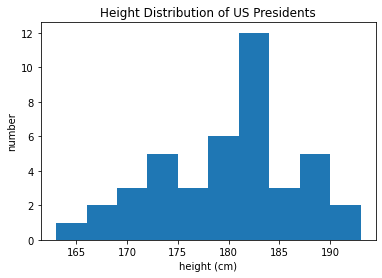

In [96]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');